In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="muted")

In [3]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [4]:
def analyze_data(data):
    print(data.isnull().sum())
    data = data.dropna()

    print('rata-rata nilai', np.mean(data['Nilai']))
    print('median nilai', np.median(data['Nilai']))
    print('modus nilai', data['Nilai'].mode()[0])
    print('standar deviasi nilai', np.std(data['Nilai']))

    plt.hist(data['Nilai'], bins=10, edgecolor='black')
    plt.title('Distribusi Nilai Siswa')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.show()

    plt.boxplot(data['Nilai'])
    plt.title('Boxplot Nilai Siswa')
    plt.ylabel('Nilai')
    plt.show()

    sns.violinplot(x=data['Nilai'])
    plt.title('Violin Plot Nilai Siswa')
    plt.xlabel('Nilai')
    plt.show()

    pd.plotting.scatter_matrix(data)
    plt.show()

Nama      0
Matpel    0
Nilai     0
dtype: int64
rata-rata nilai 85.07142857142857
median nilai 86.5
modus nilai 90
standar deviasi nilai 8.82338035088177


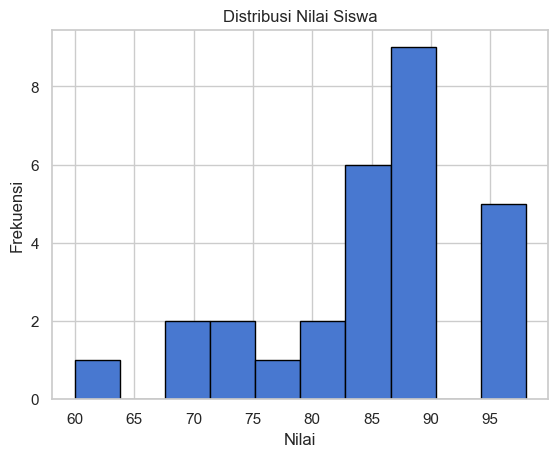

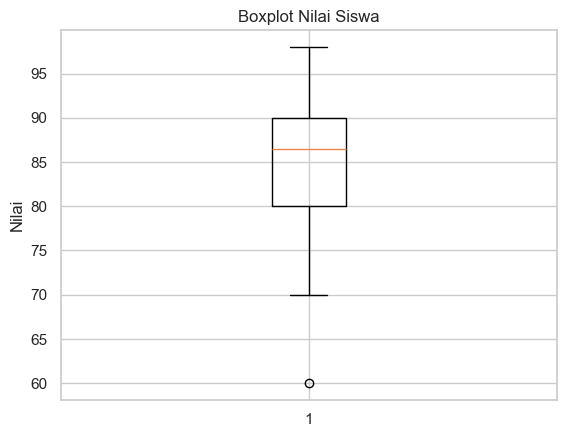

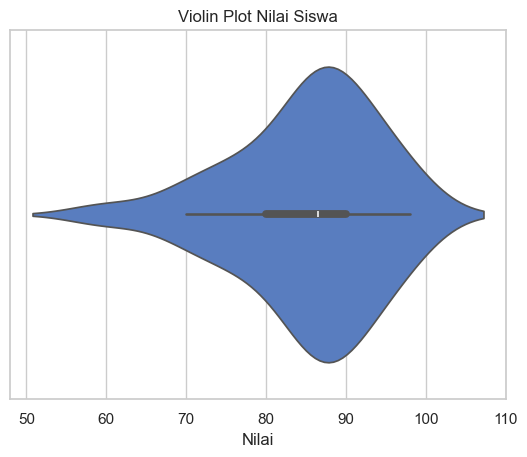

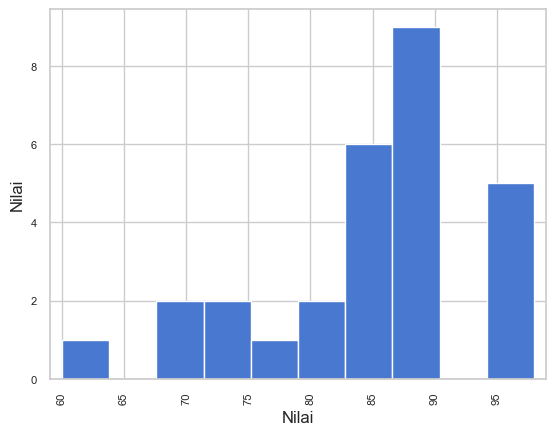

In [5]:
df = pd.read_csv('nilai_siswa.csv')
data = load_data('nilai_siswa.csv')  
analyze_data(data)

In [6]:
data = pd.read_csv('nilai_siswa.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    28 non-null     object
 1   Matpel  28 non-null     object
 2   Nilai   28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 804.0+ bytes


In [8]:
data.head()

,Nama,Matpel,Nilai
0,Ade,Bahasa Indonesia,87
1,Bara,Matematika,90
2,Aira,Bahasa Indonesia,88
3,Badi,Bahasa Inggris,78
4,Cyla,Bahasa Inggris,90


In [9]:
print(data.describe())

           Nilai
count  28.000000
mean   85.071429
std     8.985291
min    60.000000
25%    80.000000
50%    86.500000
75%    90.000000
max    98.000000


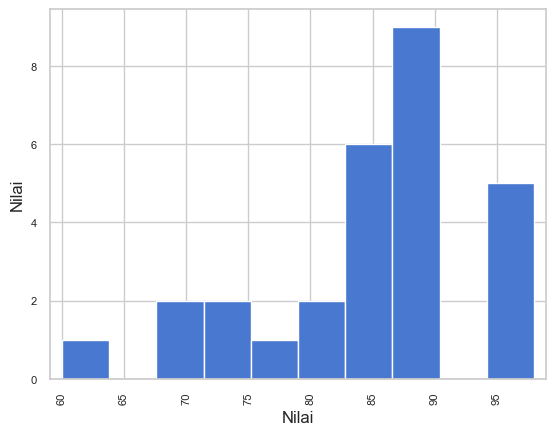

In [10]:
pd.plotting.scatter_matrix(data)
plt.show()

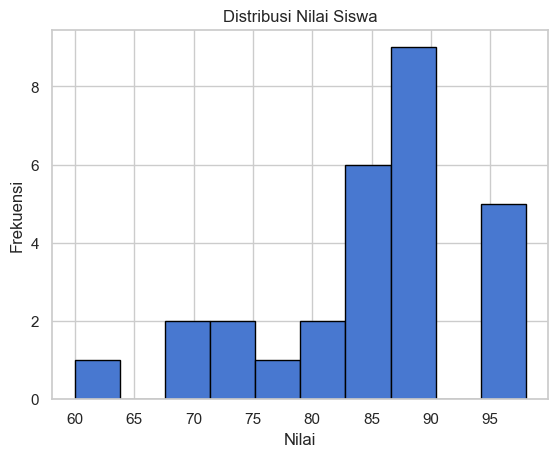

In [11]:
plt.hist(data['Nilai'], bins=10, edgecolor='black')
plt.title('Distribusi Nilai Siswa')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()



In [12]:
print(data.isnull().sum())
data = data.dropna()


Nama      0
Matpel    0
Nilai     0
dtype: int64


rata-rata nilai 85.07142857142857
median nilai 86.5
modus nilai 90
standar deviasi nilai 8.82338035088177


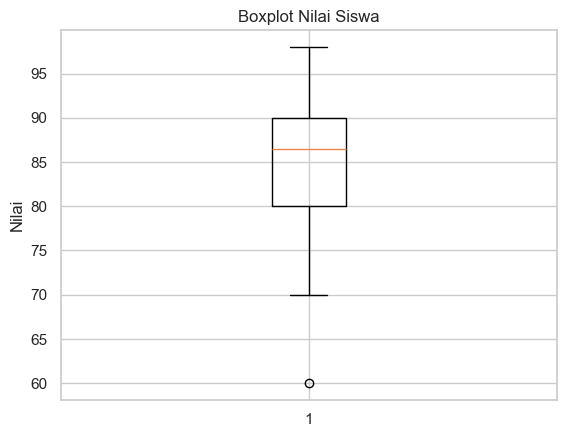

In [13]:
print('rata-rata nilai', np.mean(data['Nilai']))
print('median nilai', np.median(data['Nilai']))
print('modus nilai', data['Nilai'].mode()[0])
print('standar deviasi nilai', np.std(data['Nilai']))

plt.boxplot(data['Nilai'])
plt.title('Boxplot Nilai Siswa')
plt.ylabel('Nilai')
plt.show()

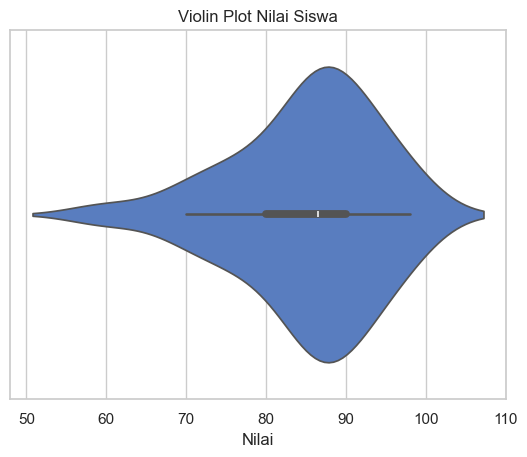

In [14]:
sns.violinplot(x=data['Nilai'])
plt.title('Violin Plot Nilai Siswa')
plt.xlabel('Nilai')
plt.show()

In [15]:
print("Jumlah siswa:", df['Nama'].nunique())
print("Jumlah total data:", len(df))
print("\nNilai rata-rata keseluruhan:", round(df['Nilai'].mean(), 2))
print("Nilai tertinggi:", df['Nilai'].max())
print("Nilai terendah:", df['Nilai'].min())


Jumlah siswa: 26
Jumlah total data: 28

Nilai rata-rata keseluruhan: 85.07
Nilai tertinggi: 98
Nilai terendah: 60


Matpel
Fisika              89.333333
Bahasa Inggris      87.000000
Matematika          85.750000
Produktif           84.000000
Bahasa Indonesia    77.833333
Name: Nilai, dtype: float64


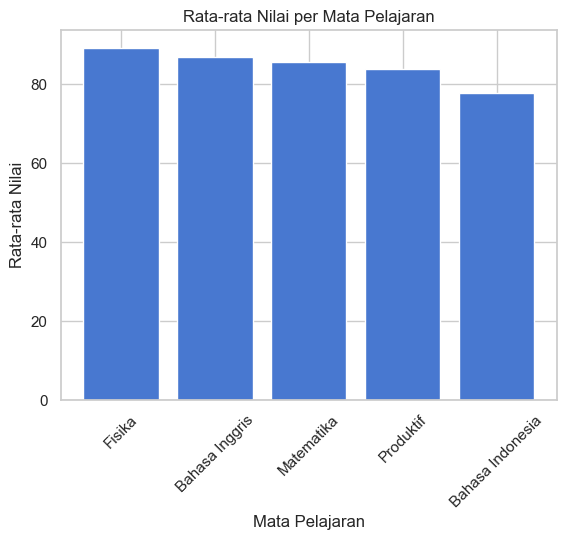

In [16]:
rata_per_mapel = df.groupby('Matpel')['Nilai'].mean().sort_values(ascending=False)
print(rata_per_mapel)
plt.bar(rata_per_mapel.index, rata_per_mapel.values)
plt.title('Rata-rata Nilai per Mata Pelajaran')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14676\2867501098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_per_mapel.index, y=rata_per_mapel.values, palette="viridis")


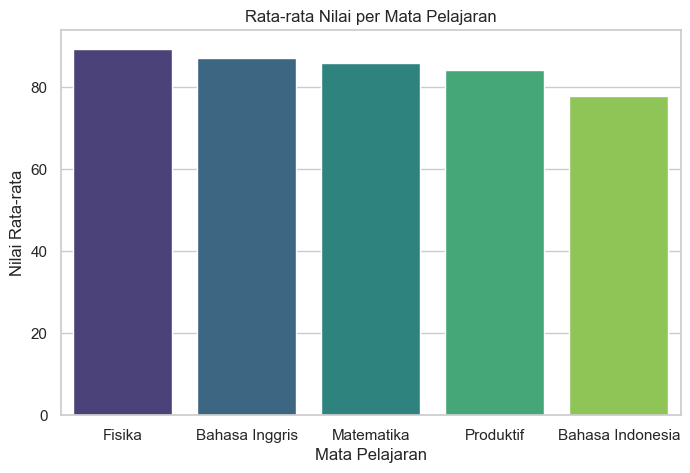

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=rata_per_mapel.index, y=rata_per_mapel.values, palette="viridis")
plt.title("Rata-rata Nilai per Mata Pelajaran")
plt.ylabel("Nilai Rata-rata")
plt.xlabel("Mata Pelajaran")
plt.show()

In [18]:
matematika = df[df['Matpel'] == 'Matematika']
print(matematika)

      Nama      Matpel  Nilai
1     Bara  Matematika     90
5   Khansa  Matematika     98
7      Dwi  Matematika     70
23    Fara  Matematika     85


In [19]:
print("\n=== Insight Analisis Profesional ===")
best_subject = rata_per_mapel.idxmax()
worst_subject = rata_per_mapel.idxmin()
best_score = df['Nilai'].max()
best_student = df.loc[df['Nilai'].idxmax(), 'Nama']

print(f"- Mata pelajaran dengan rata-rata tertinggi: {best_subject} ({rata_per_mapel.max():.2f})")
print(f"- Mata pelajaran dengan rata-rata terendah: {worst_subject} ({rata_per_mapel.min():.2f})")
print(f"- Siswa dengan nilai tertinggi: {best_student} ({best_score})")
print(f"- Nilai rata-rata keseluruhan siswa: {df['Nilai'].mean():.2f}")
print(f"- Variasi nilai antar pelajaran cukup {'besar' if df.groupby('Matpel')['Nilai'].std().mean() > 5 else 'kecil'} (std rata-rata: {df.groupby('Matpel')['Nilai'].std().mean():.2f})")


=== Insight Analisis Profesional ===
- Mata pelajaran dengan rata-rata tertinggi: Fisika (89.33)
- Mata pelajaran dengan rata-rata terendah: Bahasa Indonesia (77.83)
- Siswa dengan nilai tertinggi: Khansa (98)
- Nilai rata-rata keseluruhan siswa: 85.07
- Variasi nilai antar pelajaran cukup besar (std rata-rata: 8.31)


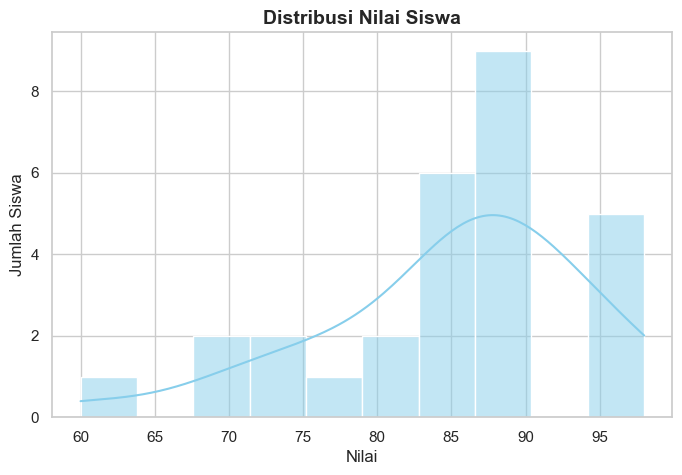

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Nilai'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Nilai Siswa", fontsize=14, weight='bold')
plt.xlabel("Nilai")
plt.ylabel("Jumlah Siswa")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14676\2304677355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Matpel', y='Nilai', palette="coolwarm")


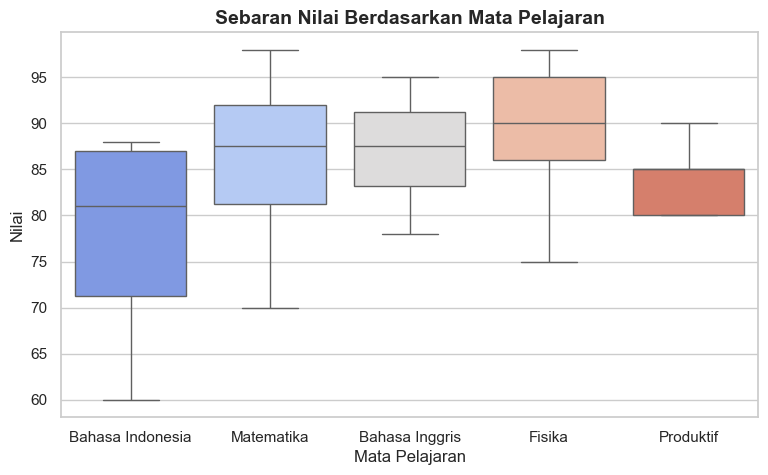

In [21]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x='Matpel', y='Nilai', palette="coolwarm")
plt.title("Sebaran Nilai Berdasarkan Mata Pelajaran", fontsize=14, weight='bold')
plt.xlabel("Mata Pelajaran")
plt.ylabel("Nilai")
plt.show()


In [22]:
print("=== VALIDASI DATA ===")
print(df.info())
print("\nJumlah data:", len(df))
print("Jumlah siswa unik:", df['Nama'].nunique())
print("Jumlah mata pelajaran:", df['Matpel'].nunique())
print("Nilai duplikat:", df.duplicated().sum())

=== VALIDASI DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    28 non-null     object
 1   Matpel  28 non-null     object
 2   Nilai   28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 804.0+ bytes
None

Jumlah data: 28
Jumlah siswa unik: 26
Jumlah mata pelajaran: 5
Nilai duplikat: 0


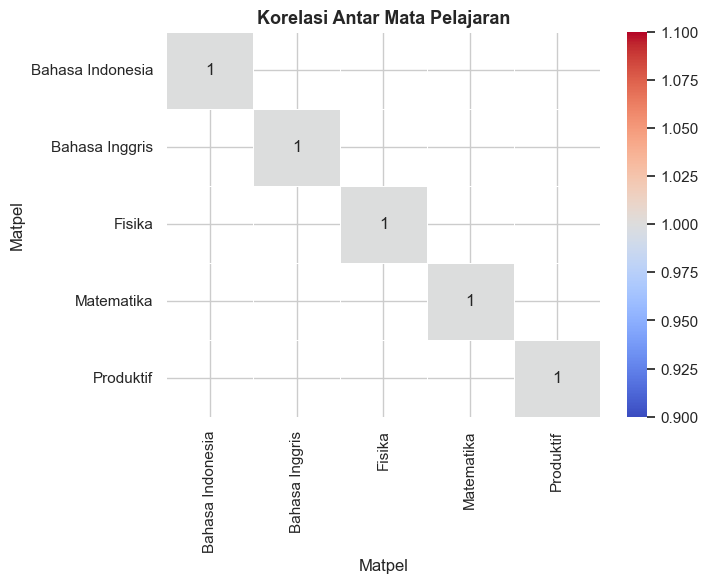


=== REKOMENDASI ===
- Fokus peningkatan diperlukan pada pelajaran Bahasa Indonesia (rata-rata terendah).
- Performa sangat baik terlihat pada Fisika dan Matematika, menunjukkan pemahaman konsep kuat.
- Disarankan dilakukan mentoring antar siswa berprestasi (seperti Ryan dan Khansa) ke siswa dengan nilai rendah untuk peningkatan kolektif.
- Secara umum, distribusi nilai stabil, dengan rata-rata di atas 85 (kategori Baik).


In [23]:
pivot_df = df.pivot_table(index='Nama', columns='Matpel', values='Nilai')
corr = pivot_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Mata Pelajaran", fontsize=13, weight='bold')
plt.show()

print("\n=== REKOMENDASI ===")
print("- Fokus peningkatan diperlukan pada pelajaran Bahasa Indonesia (rata-rata terendah).")
print("- Performa sangat baik terlihat pada Fisika dan Matematika, menunjukkan pemahaman konsep kuat.")
print("- Disarankan dilakukan mentoring antar siswa berprestasi (seperti Ryan dan Khansa) ke siswa dengan nilai rendah untuk peningkatan kolektif.")
print("- Secara umum, distribusi nilai stabil, dengan rata-rata di atas 85 (kategori Baik).")